In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Test technique



### 1- Les 20 premières stations en terme de validation

In [70]:
# Charger les données dans un dataframe
df = pd.read_csv("data.csv", sep=';')
df1 = pd.read_csv("data.csv", sep=';')
df2 = pd.read_csv("data.csv", sep=';')

In [71]:
df

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,01/06/2022,800,854,903,VILLENNES-SUR-SEINE,64949,NAVIGO,485
1,01/06/2022,800,854,92,BONNIERES,66741,?,5
2,01/06/2022,800,854,92,BONNIERES,66741,AMETHYSTE,8
3,01/06/2022,800,854,92,BONNIERES,66741,FGT,9
4,01/06/2022,800,854,92,BONNIERES,66741,NAVIGO,415
...,...,...,...,...,...,...,...,...
1048570,27/06/2022,100,110,99,BOULOGNE-JEAN JAURES,71147,FGT,5
1048571,23/06/2022,100,110,1228,MAIRIE ST-OUEN,72168,AUTRE TITRE,864
1048572,27/06/2022,100,ND,ND,Inconnu,0,AMETHYSTE,7
1048573,23/06/2022,100,110,1228,MAIRIE ST-OUEN,72168,NAVIGO,9663


In [73]:
#df1

In [74]:
#On groupe par libellé d'arrêt car il y avait plusieurs données pour les même arrêts
validation_counts = df.groupby("LIBELLE_ARRET").size().reset_index(name="NB_VALD") 
#on charge par ordre croissant nos arrêts
data_20 = validation_counts.sort_values(by = ["NB_VALD"], ascending = False) 
#on prend les 20 premiers arrêts
top_20 = data_20.head(20) 
#on affiche
top_20

,LIBELLE_ARRET,NB_VALD
254,GARE DE LYON,4715
313,LA DEFENSE-GRANDE ARCHE,3798
255,GARE DU NORD,3145
460,NATION,3143
605,SAINT-LAZARE,3143
286,INVALIDES,3142
123,CHARLES DE GAULLE ETOILE,3136
188,DENFERT-ROCHEREAU,3134
253,GARE DE L'EST,3114
296,JAVEL,3108


### 2-  Illustration graphique de ce classement

J'ai donc décidé d'illuster le classement avec un histogramme car selon moi ce graphique permettai d'avoir une meilleure visualisation.

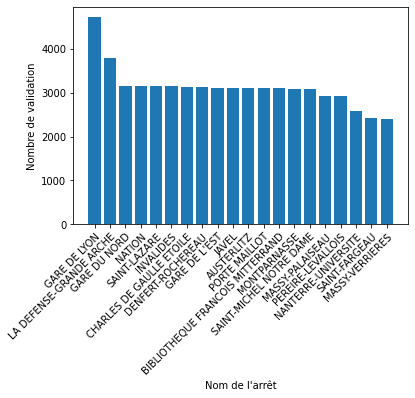

In [75]:
fig, ax = plt.subplots()
#x = plt.bar(top_20["LIBELLE_ARRET"], top_20["NB_VALD"])
#récuperation des données à afficher sur le graphique
ax.bar(top_20["LIBELLE_ARRET"], top_20["NB_VALD"])

# récupérer les étiquettes de l'axe x
x_labels = ax.get_xticklabels()

# incliner les étiquettes de 30 degrés
plt.setp(x_labels, rotation=45, ha="right", rotation_mode="anchor")


ax.set_xlabel("Nom de l'arrêt")
ax.set_ylabel("Nombre de validation")
plt.show()

### 3-  Classification des arrêts 

En me basant uniquement sur le nombre de validations par titre de transport, j'ai décidé de classer les arrêts par catégorie "peu fréquenté", "frequenté" et "très fréquenté".
Pour cela j'ai défini des seuils auxquels j'y ai mis des valeurs choisies arbitrairement mais en rapport avec les données.

In [76]:
# définir les seuils pour la classification
seuil_haut = 1000
seuil_bas = 500
# Classer les arrêts en se basant sur les seuils
validation_counts['Classe'] = 'Peu fréquenté'
validation_counts.loc[validation_counts['NB_VALD']>= seuil_haut, 'Classe'] = 'Très fréquenté'
validation_counts.loc[(validation_counts['NB_VALD']< seuil_haut) & (validation_counts['NB_VALD']>= seuil_bas), 'Classe'] = 'Fréquenté'

validation_counts

,LIBELLE_ARRET,NB_VALD,Classe
0,ABBESSES,1555,Très fréquenté
1,ABLON,1369,Très fréquenté
2,ACHERES-GRAND-CORMIER,1066,Très fréquenté
3,ACHERES-VILLE,1407,Très fréquenté
4,AEROPORT CHARLES DE GAULLE 1,1400,Très fréquenté
...,...,...,...
724,VOLTAIRE (LEON BLUM),1568,Très fréquenté
725,VOSVES,539,Fréquenté
726,VULAINES-SUR-SEINE-SAMOREAU,960,Fréquenté
727,WAGRAM,1543,Très fréquenté


### 4-  Prédictions pour le nombre de validations


In [77]:
# Creation of the prediction model
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from time import time
from datetime import datetime

In [78]:
logisticRegression = LogisticRegression(max_iter = 10000)
df.dtypes

JOUR               object
CODE_STIF_TRNS      int64
CODE_STIF_RES      object
CODE_STIF_ARRET    object
LIBELLE_ARRET      object
ID_REFA_LDA         int64
CATEGORIE_TITRE    object
NB_VALD             int64
dtype: object

Nous observons ci-dessus que la colonne "JOUR" est de type objet. Pour notre exercice, nous avons besoin d'un type datetime.
C'est donc ce que nous faisons ci-dessous, changer le type de la colonne

In [79]:
#changer le type DATE
df["JOUR"] = pd.to_datetime(df["JOUR"], format='%d/%m/%Y')
df1["JOUR"] = pd.to_datetime(df1["JOUR"], format='%d/%m/%Y')
df2["JOUR"] = pd.to_datetime(df2["JOUR"], format='%d/%m/%Y')

On observe ci-dessous que le type a bel et bien été changé.

In [80]:
#df.dtypes

In [81]:
df1.dtypes

JOUR               datetime64[ns]
CODE_STIF_TRNS              int64
CODE_STIF_RES              object
CODE_STIF_ARRET            object
LIBELLE_ARRET              object
ID_REFA_LDA                 int64
CATEGORIE_TITRE            object
NB_VALD                     int64
dtype: object

In [82]:
#df1

##### On fait donc la prédiction pour le nombre de validations dans les stations "OLYMPIADES" et "M. MONTROUGE" sur la période du 24 au 30 juin 2022.

In [83]:
# On selectionne les lignes qui correspondent aux stations "Montrouge" et "Olympiades"
df1 = df1[(df1["LIBELLE_ARRET"] == "MONTROUGE") | (df1["LIBELLE_ARRET"] == "OLYMPIADES")]

# On selectionne les lignes qui correspondent à la période du 24 au 30 juin
start_date = datetime.strptime("24/06/2022", '%d/%m/%Y')
end_date = datetime.strptime("30/06/2022", '%d/%m/%Y')
df1 = df1[(df1["JOUR"] >= start_date) & (df1["JOUR"] <= end_date)]

# On créer une colonne "noms" pour stocker les noms de la station
df1["noms"] = df1["LIBELLE_ARRET"]

# On remplace les valeurs de la colonne "noms" par des valeurs numériques
df1["noms"].replace({"MONTROUGE": 0, "OLYMPIADES": 1}, inplace=True)

# On selectionne les colonnes "nombre_validation" et "noms" pour entraîner le modèle
X = df1[["NB_VALD", "noms"]]
y = df1["NB_VALD"]

# créer un objet de régression linéaire
reg = LinearRegression()
reg.fit(X, y)

# utiliser le modèle pour faire des prédictions sur les données de test
predictions = reg.predict(X)

# afficher les prédictions
print(predictions)

[  556.   918.  1042. 11155.   810.  1544.  4452.  3127.    34.  1462.
   958.  3615.  1556.   130.  1084.   965.  3217. 11474.    75.  6952.
    61.  1530.    15.    34.  1103.   508.   993.   973.   566.   485.
    18.   134.   440.  2645.  1156.   803.   600.   117.   994.  1604.
   586.  3404.  1514.   560.  3240.    28.  1490.   371.   597.   596.
   122.   539. 10583. 10585.]


##### Afin que les prédictions soient plus compréhensibles, on les affiche sur un histogramme.

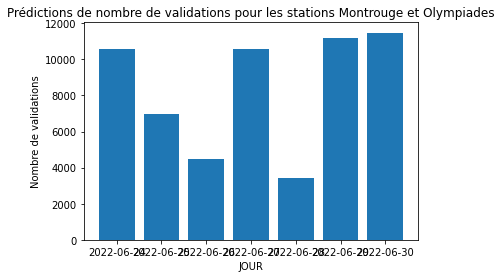

In [84]:
plt.bar(df1["JOUR"], predictions)

plt.xlabel("JOUR")
plt.ylabel("Nombre de validations")
plt.title("Prédictions de nombre de validations pour les stations Montrouge et Olympiades")

plt.show()

J'ai pu observer lorsqu'on ouvre l'excel qu'il comporte les jours entre le 24 juin et le 30 juin 2022. Donc, dans un troisième dataframe (que je vais modifié mais qui contient les mêmes données que le premier), je vais regrouper les résultats et les afficher comme pour les prédictions afin de pouvoir mieux les comparer.
En effet, j'ai décidé d'utiliser cette technique car je n'ai pas trouvé sur internet ou sur le site que vous m'avez transféré un moyen de comparer mes prédictions à la réalité.

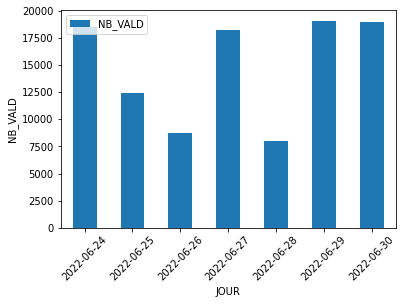

In [85]:
df2 = df2[(df2["LIBELLE_ARRET"] == "MONTROUGE") | (df2["LIBELLE_ARRET"] == "OLYMPIADES")]

start_date = datetime.strptime("24/06/2022", '%d/%m/%Y')
end_date = datetime.strptime("30/06/2022", '%d/%m/%Y')
df2 = df2[(df2["JOUR"] >= start_date) & (df2["JOUR"] <= end_date)]

# regrouper les validations par jour et par station
validations_par_jour = df2.groupby([df2["JOUR"].dt.date,'LIBELLE_ARRET']).sum()
#comme la méthode grouby renvoie un dataframe avec un index multi-niveau alors je reinitialise l'index afin de rendre
#les colonnes accessibles
validations_par_jour = validations_par_jour.reset_index()

# afficher les résultats
validations_par_jour.plot(kind='bar',x="JOUR",y='NB_VALD', rot=45)
plt.xlabel("JOUR")
plt.ylabel('NB_VALD')
plt.show()

On observe donc que les prédictions ne renvoient pas exactement les mêmes valeurs que les données réelles. En effet, lorsque nous comparons les prédictions du 25 juin, nous sommes à 7000 validations tandis qu'avec les données réelles nous sommes à 12500 validations. Nous passons donc à des valeurs 2 fois plus faible. 

Cependant, on observe que les mouvements des histogrammes sont relativement similaires. En effet, du 24 au 26 juin; pour les deux types de données; les validations diminuent afin d'augmenter avec un pic et de rediminuer de nouveau très bas et à la fin cela se stabilise.

On en conclue que même si mes prédictions ne sont pas justes, nous pouvons avoir une vision globale de l'augmentation et de la diminution du nombre de validations par jour et les utiliser pour des analyses. Les différences de valeurs peuvent s'expliquer par une hausse de télétravail ou des jours fériés au début de l'année qui auraient été pris en compte dans mes prédictions et qui fausseraient donc mes résultats.

### 5- 10 paires de stations dont les noms sont proches

In [86]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [87]:
# extraire les noms des stations
stations = df["LIBELLE_ARRET"].unique()

# fonction fuzz.token_set_ratio pour trouver les paires de stations similaires
pairs = []
for station in stations:
    match = process.extract(station, stations, limit=10, scorer=fuzz.token_set_ratio)
    for m in match:
        if m[1] > 80 and m[0] != station:
            pairs.append((station, m[0]))
            #print(pairs)
print(pairs[:10])

[('BUSSY-SAINT-GEORGES', 'SAINT-GEORGES'), ('BUSSY-SAINT-GEORGES', 'VILLENEUVE-SAINT-GEORGES'), ('CHAMPIGNY', 'LES BOULLEREAUX-CHAMPIGNY'), ('CHARLES DE GAULLE ETOILE', 'AEROPORT CHARLES DE GAULLE 1'), ('CHARLES DE GAULLE ETOILE', 'AEROPORT CHARLES DE GAULLE 2-TGV'), ('CHATELET-LES HALLES', 'LES HALLES'), ('CHATELET-LES HALLES', 'CHATELET'), ('LA VARENNE-CHENNEVIERES', 'VARENNE'), ('LE PARC-DE-SAINT-MAUR', 'SAINT-MAUR'), ('NEUILLY-PLAISANCE', 'PLAISANCE')]
